## 线性回归实现
### NumPy 随机生成散点，LinearRegression 进行线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
x = np.linspace(0, 30, 50)
y = x + 2 * np.random.rand(50)

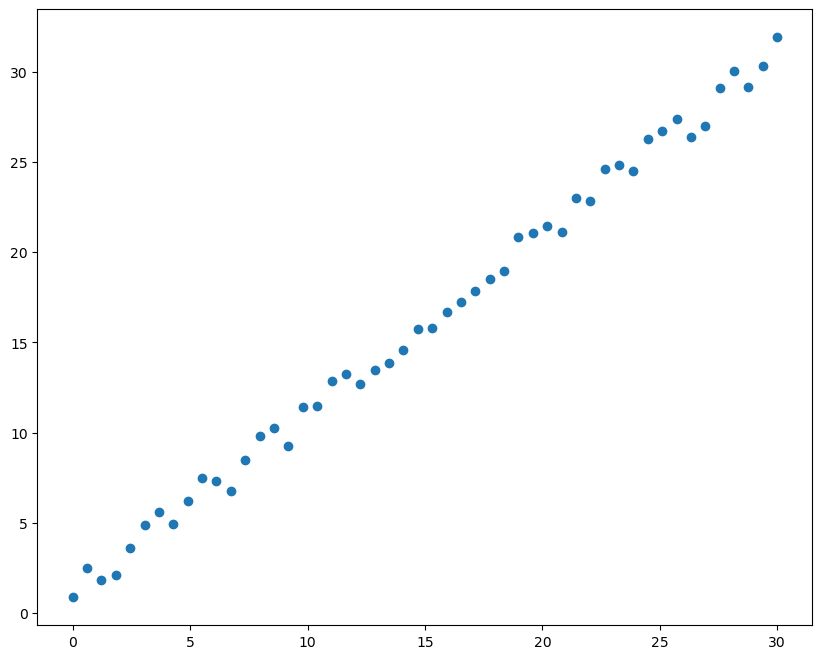

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y)

### 导入线性回归，训练数据

In [5]:
# 导入线性回归
from sklearn.linear_model import LinearRegression

In [6]:
# 初始化模型
model = LinearRegression()
# 将行变列，得到x, y坐标
x1 = x.reshape(-1, 1)
y1 = y.reshape(-1, 1)

In [9]:
# 训练数据
model.fit(x1, y1)
# 预测下 x = 40 时， y的值
print("x = 40 时，y=", model.predict(np.array(40).reshape(-1, 1)))

x = 40 时，y= [[41.09135338]]


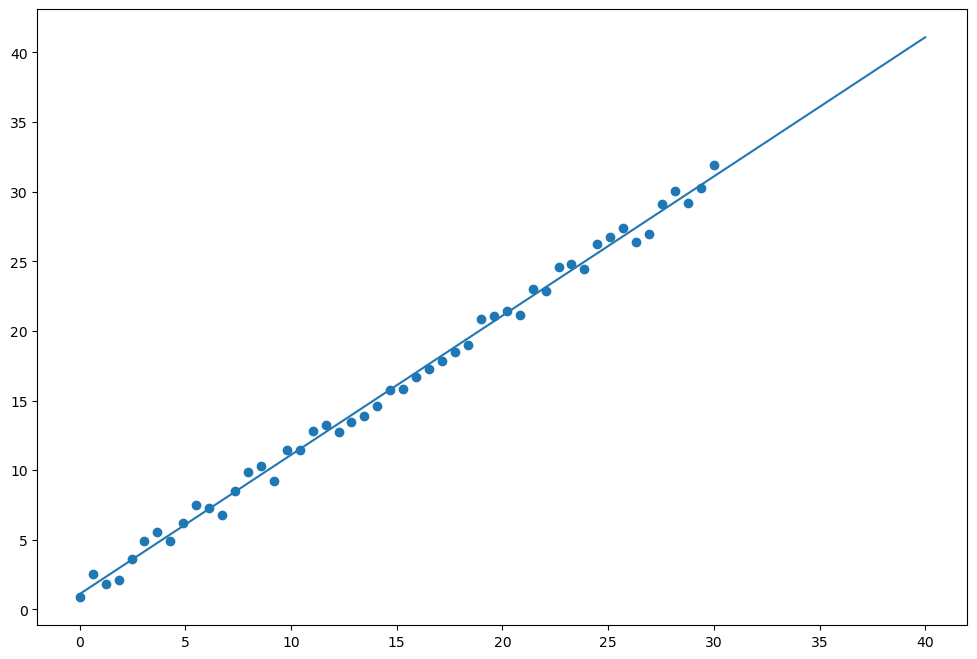

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
x_test = np.linspace(0, 40).reshape(-1, 1)
plt.plot(x_test, model.predict(x_test))

#### 通过输出 model.coef_ 和 model.intercept_ 分别查斜率和截距

In [15]:
# 斜率
print(model.coef_)
# 截距
print(model.intercept_)

# 根据结果，可以得到最后的线性回归方程结果是： y = 1.09930983x + 0.99980109

[[0.99980109]]
[1.09930983]


### 在评价线性回归模型的性能时，需要计算点到直线的距离的平方和，也就是常说的均方误差（MSE），接下来利用NumPy计算MSE

In [17]:
print(np.sum(np.square(model.predict(x1) - y1)))

19.135069207435674


### 利用 NumPy 和 SciPy 实现线性回归

#### NumPy 实现过程

In [21]:
import numpy as np

In [22]:
x = np.linspace(0, 30, 50)
y = x + 1 + np.random.normal(0, 0.1, 50)
# 一次多项式拟合，相当于线性拟合
z1 = np.polyfit(x, y, 1)
print(z1)
p1 = np.poly1d(z1)
print(p1)

[1.00055304 0.9918284 ]
 
1.001 x + 0.9918


#### SciPy 实现过程

In [24]:
from scipy import stats

In [25]:
x = np.random.random(20)
y = 5 * x + 10 + np.random.random(20)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [27]:
print("slope: %f    intercept: %f"%(slope, intercept))
print("R-squared: %f"%r_value**2)

slope: 5.064685    intercept: 10.488709
R-squared: 0.949617


### 统计模块Statsmodels 中的OLS 也可以实现线性回归，虽然简便性不如SPSS、Stata等数据分析软件，但是可以和NumPy、Pandas结合

In [29]:
import statsmodels.api as sm
import numpy as np

In [30]:
x = np.linspace(0, 10, 100)
y = 3 * x + np.random.random() + 10
X = sm.add_constant(x)
mod = sm.OLS(y, x)
result = mod.fit()

In [31]:
print(result.params)
print(result.summary())

[4.53392579]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              2543.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                    2.02e-72
Time:                        16:38:17   Log-Likelihood:                         -306.33
No. Observations:                 100   AIC:                                      614.7
Df Residuals:                      99   BIC:                                      617.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------